## EMPLOYEE ATTRITION PREDICTION

In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import binarize
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix






In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from scipy import stats
from matplotlib import rc
import collections

In [5]:
data = pd.read_csv('EAP_EXP_DATASET.csv')



In [6]:
data.head()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.shape

(14999, 10)

In [8]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Now,I mention the columns in the dataset and they are:
    
    1.satisfaction_level
    2.last_evaluation
    3.number_of_projects
    4.average_monthly_hours
    5.years_at_company
    6.work_accident
    7.left
    8.promotion_last_5years
    9.department
    10.salary

This dataset consists of 15000 rows and 10 columns.    

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   satisfaction_level_rating  14999 non-null  float64
 1   last_evaluation_rating     14999 non-null  float64
 2   number_of_projects         14999 non-null  int64  
 3   average_monthly_hours      14999 non-null  int64  
 4   years_at_company           14999 non-null  int64  
 5   work_problems              14999 non-null  int64  
 6   left                       14999 non-null  int64  
 7   promotion_last_5years      14999 non-null  int64  
 8   department                 14999 non-null  object 
 9   salary                     14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
data.isnull().sum()

satisfaction_level_rating    0
last_evaluation_rating       0
number_of_projects           0
average_monthly_hours        0
years_at_company             0
work_problems                0
left                         0
promotion_last_5years        0
department                   0
salary                       0
dtype: int64

In [12]:
data_left_1=data[data['left']==1]

In [13]:
data_left_1.head()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
data_left_1.shape

(3571, 10)

In [15]:
data.describe()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612809,0.716067,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248673,0.171261,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,0.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
data_left_1 = data[data['left']==1]
data_left_1.describe()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.439994,0.717967,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.264034,0.198011,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.000000,0.000000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.125000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [17]:
def Histo(data,to_plot):
    for i in range(len(to_plot)):
        plt.hist(data[to_plot[i]])
        plt.axvline(data[to_plot[i]].mean(),color='r')
        plt.xlabel(to_plot[i])
        plt.show()

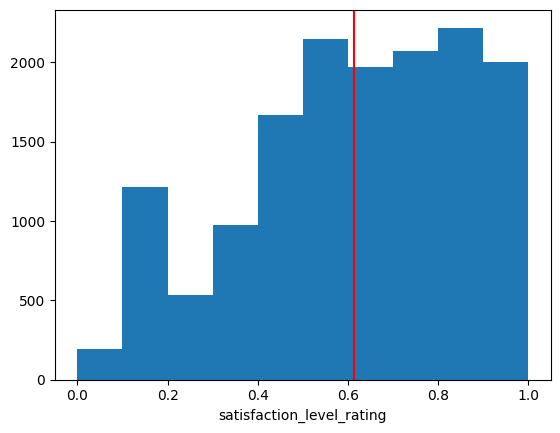

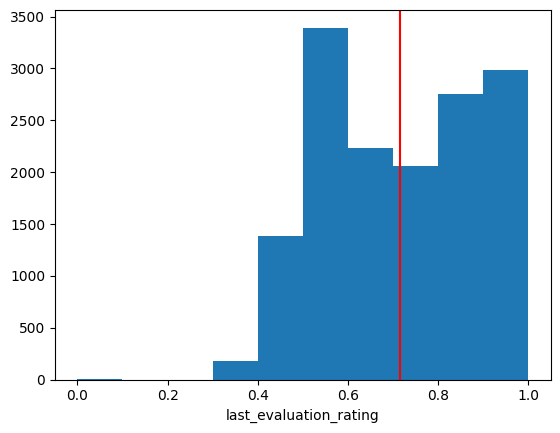

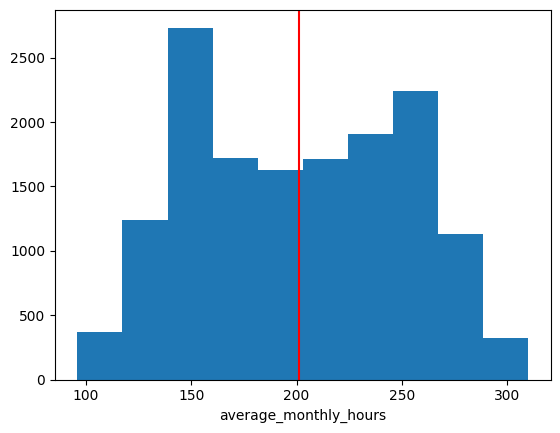

In [18]:
t_plt =['satisfaction_level_rating','last_evaluation_rating','average_monthly_hours']
Histo(data,t_plt)

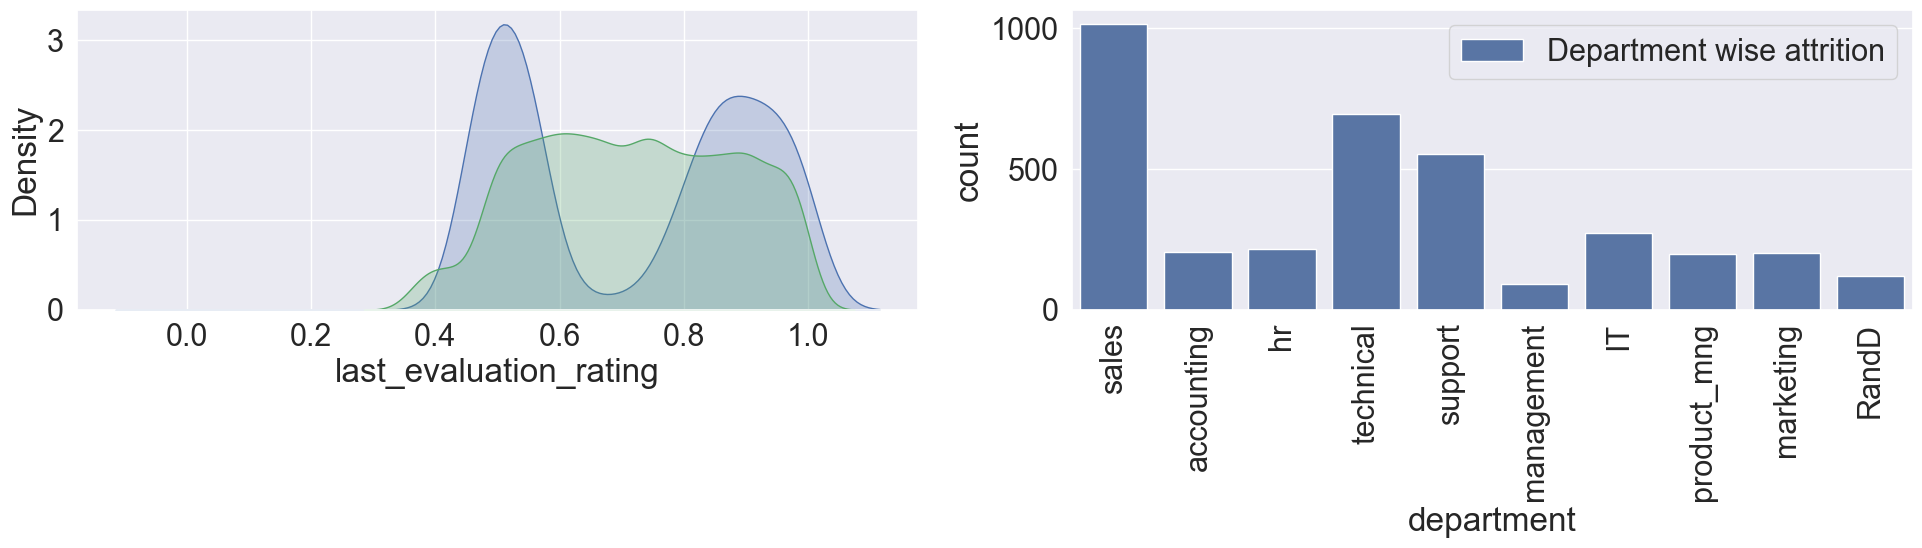

In [20]:
sns.set(font_scale=2)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
asx = data_left_1
sns.kdeplot(data=asx['last_evaluation_rating'],color='b',ax=axs[0],fill=True,label='left')
axs[0].set_xlabel('last_evaluation_rating')
asd = data[data['left']==0]
sns.kdeplot(data=asd['last_evaluation_rating'],color='g',ax=axs[0],fill=True,label='stayed')
sns.countplot(x=asx['department'],ax=axs[1],label='Department wise attrition')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
target_mappers = {'sales':0,'accounting':1,'technical':3,'support':4,'management':5,'IT':6,'product_mng':7,'marketing':8,'RandD':9,'hr':2}
def target_encode(val):
    return target_mappers[val]

data['department'] = data['department'].apply(target_encode)
print(data['department'])

KeyError: 0

In [21]:
sns.set(font_scale=1)
plt.figure(figsize=(9,4))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'sales'

<Figure size 900x400 with 0 Axes>

In [18]:
data.corr()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,left,promotion_last_5years
satisfaction_level_rating,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation_rating,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_of_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
years_at_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_problems,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [19]:
ftr=['number_of_projects','years_at_company','department','work_problems','promotion_last_5years','salary']

In [20]:
ftr

['number_of_projects',
 'years_at_company',
 'department',
 'work_problems',
 'promotion_last_5years',
 'salary']

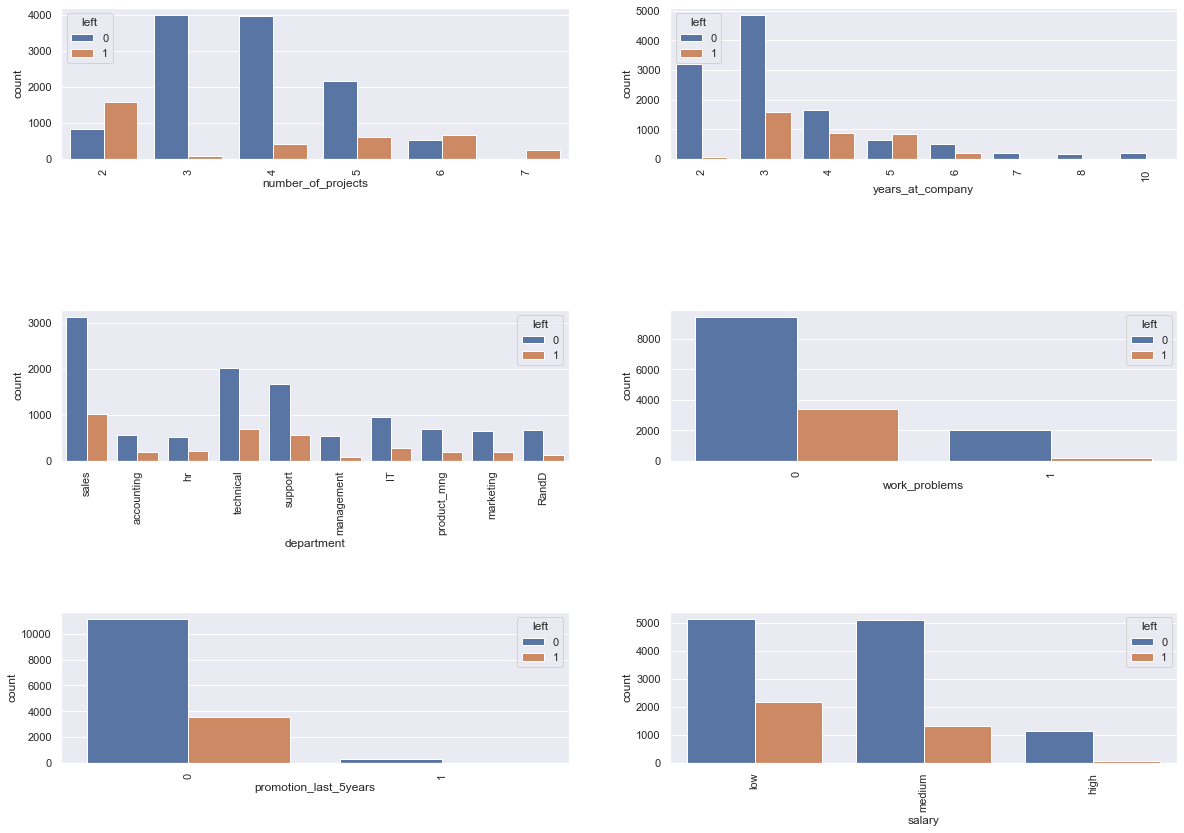

In [21]:
fig=plt.subplots(figsize=(20,25))
for p,q in enumerate(ftr):
    plt.subplot(5,2,p+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=q,data=data,hue="left")
    plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


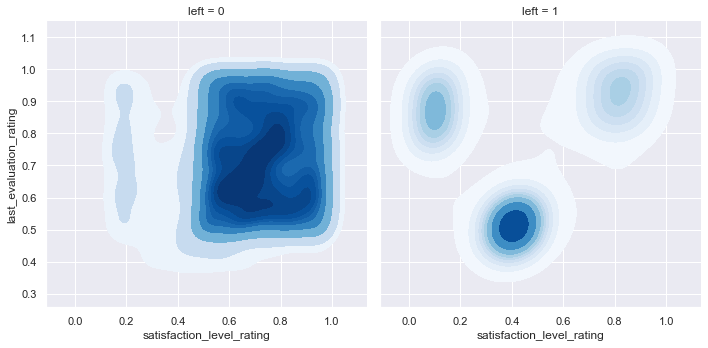

In [22]:
sns.set(color_codes=True)
plot = sns.FacetGrid(data,col='left',hue='left',size=5)
plot.map(sns.kdeplot,'satisfaction_level_rating','last_evaluation_rating',shade=True,cmap='Blues')
plt.show()

## The above plot helps in clear visualization of the target label.Here Left=0 reveals about the employees who has not left the firm.Left=1 reveals about the employees who has left the firm.Here we can find two clusters in the first face grid and three clusters in the second face grid.

In the first face grid:larger cluster denotes the employess who has higher satisfaction_level and last_evaluation and stays in the firm.


In the second face grid,we deal with three types of issues:(deals with the employees who left the firm)

   1.employees with low satisfaction_level and low last_evaluation score.
   
   2.employees with low satisfaction_level and medium last_evaluation_score.
   
   3.employees with high satisfaction level and high last_evaluation score.
   
The firm experiences a heavier loss due lo lost of third type of employees in the second face grid.i.e the employees with higher satisfaction_level and last_evaluation.   

Now lets plot for this third tier of employees whose lose effects the company a lot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


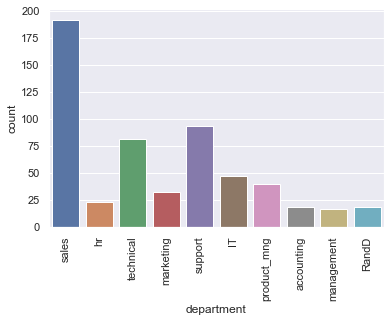

In [23]:
third=data_left_1[[all([a,b]) for a,b in zip(data_left_1['last_evaluation_rating'] > data['last_evaluation_rating'].mean(),data_left_1['satisfaction_level_rating']>data['satisfaction_level_rating'].mean())]]
third_low= third[third['salary']=='low']
sns.countplot(third_low['department'])
plt.xticks(rotation=90)
plt.show()

In [25]:
dept = data['department'].unique()
avgl =[]
avge =[]
avgp =[]
avgh =[]
for i in dept:
    mean = data['satisfaction_level_rating'][data['department']==i].mean()
    avgl.append(mean)       
for i in dept:
    mean = data['last_evaluation_rating'][data['department']==i].mean()
    avge.append(mean)       
for i in dept:
    meap = data['number_of_projects'][data['department']==i].mean()
    avgp.append(mean)
for i in dept:
    mean = data['average_monthly_hours'][data['department']==i].mean()
    avgh.append(mean)

In [26]:
avg=pd.DataFrame({'Dept': dept,'AVGL':avgl,'AVGE':avge,'AVGP':avgp,'AVGH':avgh},index=None)

In [27]:
avg

,Dept,AVGL,AVGE,AVGP,AVGH
0,sales,0.614447,0.709717,0.712122,200.911353
1,accounting,0.582151,0.717718,0.712122,201.162973
2,hr,0.598809,0.708850,0.712122,198.684709
3,technical,0.607897,0.721099,0.712122,202.497426
4,support,0.618300,0.723109,0.712122,200.758188
5,management,0.621349,0.724000,0.712122,201.249206
6,IT,0.618142,0.716830,0.712122,202.215974
7,product_mng,0.619634,0.714756,0.712122,199.965632
8,marketing,0.618601,0.715886,0.712122,199.385781
9,RandD,0.619822,0.712122,0.712122,200.800508


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


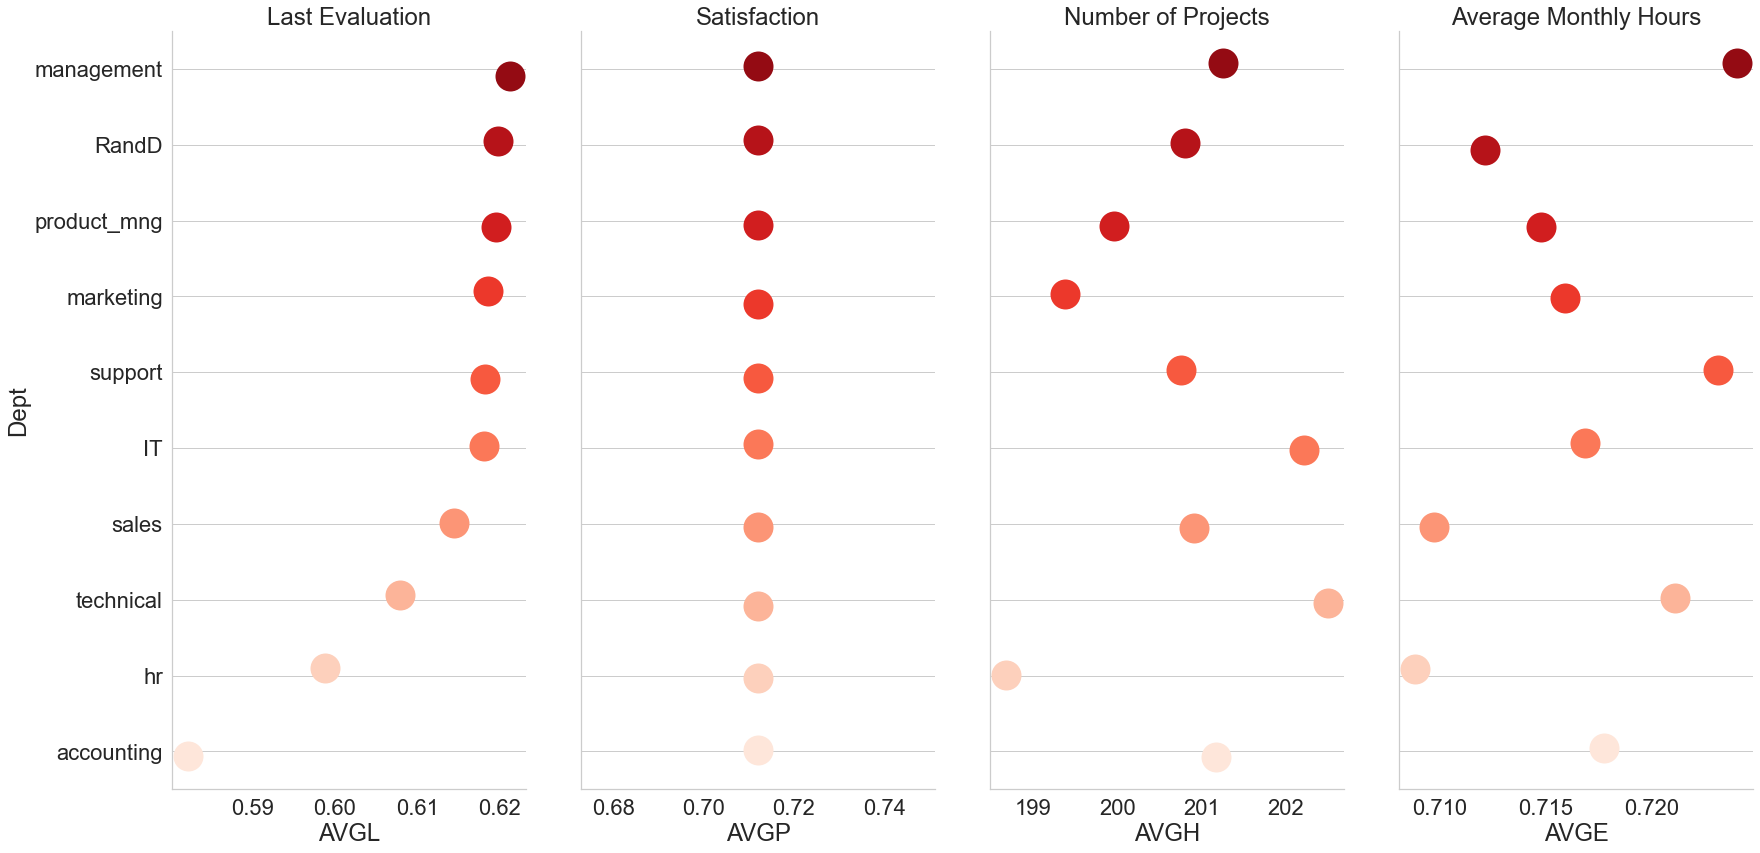

In [28]:
sns.set(style="whitegrid",font_scale=2)
p= sns.PairGrid(avg.sort_values('AVGL',ascending=False),y_vars='Dept',x_vars=['AVGL','AVGP','AVGH','AVGE'],size=12,aspect=0.5)
p.map(sns.stripplot,orient='h',palette="Reds_r", edgecolor="gray",size=30,)
titles = ["Last Evaluation", "Satisfaction", "Number of Projects",'Average Monthly Hours']
plt.title('Department wise performance based on mentioned features')
for a,t in zip(p.axes.flat, titles):

    # Set a different title for each axes
    a.set(title=t)

    # Make the grid horizontal instead of vertical
    a.xaxis.grid(False)
    a.yaxis.grid(True)
plt.show()

## Implementation

Lets dive into the most interesting portion of the project that is to predict the employees who has left the firm with the help of supervised machine learning algorithms.

## Pre-processing the data

Here we clean the data and make it ready for the model to fit and predict.

In [29]:
data.isnull().sum()

satisfaction_level_rating    0
last_evaluation_rating       0
number_of_projects           0
average_monthly_hours        0
years_at_company             0
work_problems                0
left                         0
promotion_last_5years        0
department                   0
salary                       0
dtype: int64

In [43]:
features = data.drop(['left'],axis=1)
target= data['left']
lb = LabelEncoder()
features['salary']= lb.fit_transform(features['salary'])
features['department']= lb.fit_transform(features['department'])


In [44]:
print("Department categories:", lb.classes_)


Department categories: ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


In [45]:
features.head()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [46]:
features

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


Now we implement the train_test_split to split the data into testing sets and training sets.

In [56]:


X_train, X_test,y_train,y_test = train_test_split(features,target,test_size=0.4,random_state=2)


In [57]:
X_train.head()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,promotion_last_5years,department,salary
1218,0.42,0.56,2,146,3,0,0,1,1
2728,0.55,0.49,3,152,2,0,0,9,2
6464,0.67,0.97,5,239,3,0,0,8,1
11187,0.49,0.91,4,134,4,0,0,2,1
5743,0.95,0.68,5,225,3,0,0,7,2


In [49]:
# scaling process to improve results
from sklearn import preprocessing

Xscale_train = pd.DataFrame(preprocessing.scale(X_train.values))
Xscale_test  = pd.DataFrame(preprocessing.scale(X_test.values))
yscale_train = pd.DataFrame(preprocessing.scale(y_train.values))
yscale_test  = pd.DataFrame(preprocessing.scale(y_test.values))


In [50]:
Xscale_train.head()

,0,1,2,3,4,5,6,7,8
0,-0.794617,-0.912659,-1.460174,-1.091920,-0.335018,-0.413132,-0.147258,-1.692066,-0.551061
1,-0.269758,-1.321333,-0.647401,-0.971623,-1.026334,-0.413132,-0.147258,1.101989,1.040401
2,0.214727,1.481007,0.978146,0.772693,-0.335018,-0.413132,-0.147258,0.752732,-0.551061
3,-0.512001,1.130714,0.165373,-1.332516,0.356298,-0.413132,-0.147258,-1.342809,-0.551061
4,1.345192,-0.212074,0.978146,0.491998,-0.335018,-0.413132,-0.147258,0.403475,1.040401


In [51]:
yscale_train.head()

,0
0,1.806911
1,-0.553431
2,-0.553431
3,-0.553431
4,-0.553431


## Model Testing and Training

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

g = GaussianNB()
g.fit(Xscale_train, y_train)
y_pred_train = g.predict(Xscale_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", accuracy_train)

y_pred = g.predict(Xscale_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Training accuracy: 0.8075341704633848
Testing Accuracy: 0.8103333333333333
Confusion matrix:
 [[3812  727]
 [ 411 1050]]


In [60]:
from sklearn.metrics import accuracy_score
k = KNeighborsClassifier()
k.fit(X_train, y_train)
k_pred = k.predict(X_test)
print(accuracy_score(y_test, k_pred), "Initial Score")

# specify the hyperparameters to tune
param_grid = {
    'n_neighbors': range(1, 18),
    'weights': ['uniform', 'distance']
}
# perform grid search with cross-validation
grid = GridSearchCV(k, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)
k_best = grid.best_estimator_

k_best_pred = k_best.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, k_best_pred))
conf_matrix = confusion_matrix(y_test, k_best_pred)
print("Confusion matrix:\n", conf_matrix)


0.9326666666666666 Initial Score
Best parameters: {'n_neighbors': 6, 'weights': 'distance'}
Best score: 0.9425492557593724
Test accuracy: 0.9468333333333333
Confusion matrix:
 [[4316  223]
 [  96 1365]]


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

t = DecisionTreeClassifier( max_depth=5)


t.fit(X_train, y_train)


t_pred = t.predict(X_test)


print("test accuracy:",accuracy_score(y_test, t_pred))


# generate confusion matrix

conf_matrix = confusion_matrix(y_test, t_pred)
print("Confusion matrix:\n", conf_matrix)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

t = DecisionTreeClassifier(max_depth=5)

t.fit(X_train, y_train)

t_pred = t.predict(X_test)
print("test accuracy:", accuracy_score(y_test, t_pred))

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, t_pred)
print("Confusion matrix:\n", conf_matrix)
# calculate precision, recall, and f1 score
precision = precision_score(y_test, t_pred)
recall = recall_score(y_test, t_pred)
f1 = f1_score(y_test, t_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


test accuracy: 0.9736666666666667
Confusion matrix:
 [[4494   45]
 [ 113 1348]]
Precision: 0.97
Recall: 0.92
F1 Score: 0.94


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

acc_score = accuracy_score(y_test, rfc_pred)
print('test Accuracy:', acc_score)
print('Number of decision trees:', len(rfc.estimators_))

# generate confusion matrix

conf_matrix = confusion_matrix(y_test, rfc_pred)
print("Confusion matrix:\n", conf_matrix)

# Import the Random Forest classifier and relevant metrics for evaluating model performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

# Create an instance of the Random Forest classifier
rfc = RandomForestClassifier()

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
rfc_pred = rfc.predict(X_test)

# Calculate and print the accuracy score achieved by the model on the test data
acc_score = accuracy_score(y_test, rfc_pred)
print('Test Accuracy:', acc_score)

# Calculate and print the number of decision trees used by the model
print('Number of Decision Trees:', len(rfc.estimators_))

# Calculate and print the F1 score achieved by the model on the test data
#f1_score = f1_score(y_test, rfc_pred, average='weighted')
#print('F1 Score:', f1_score)

# Calculate and print the recall score achieved by the model on the test data
#precall_score = recall_score(y_test, rfc_pred, average='weighted')
#pprint('Recall Score:', recall_score)

# Calculate and print the precision score achieved by the model on the test data
#pprecision_score = precision_score(y_test, rfc_pred, average='weighted')
#pprint('Precision Score:', precision_score)

# Calculate and print the confusion matrix for the model's predictions
#pconf_matrix = confusion_matrix(y_test, rfc_pred)
print("Confusion matrix:\n", conf_matrix)


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

acc_score = accuracy_score(y_test, rfc_pred)
print('Test Accuracy:', acc_score)
print('Number of Decision Trees:', len(rfc.estimators_))
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)
print("Confusion matrix:\n", conf_matrix)
# Calculate precision, recall, and f1 score
recall = recall_score(y_test, rfc_pred)
f1 = f1_score(y_test, rfc_pred)

print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Test Accuracy: 0.9888333333333333
Number of Decision Trees: 100
Confusion matrix:
 [[4537    2]
 [  65 1396]]
Recall: 0.96
F1 Score: 0.98


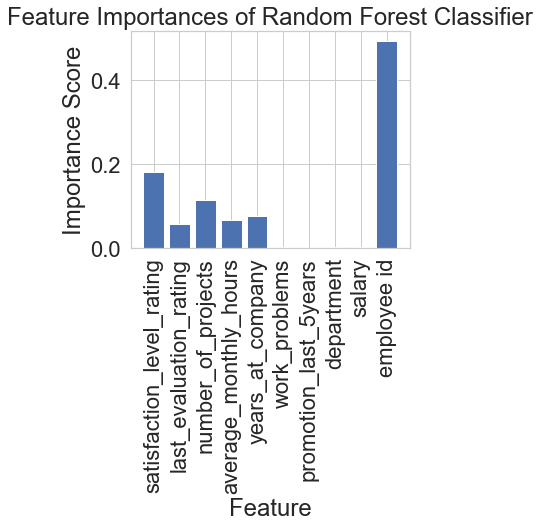

In [59]:
import matplotlib.pyplot as plt

# get feature importances
importance_scores = rfc.feature_importances_

# get feature names
feature_names = list(X_train.columns)

# create a bar chart of feature importances
plt.figure(figsize=(5,4))
plt.bar(range(len(importance_scores)), importance_scores)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances of Random Forest Classifier")
plt.show()


In [57]:
X_train.head()

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,promotion_last_5years,department,salary
1218,0.42,0.56,2,146,3,0,0,1,1
2728,0.55,0.49,3,152,2,0,0,9,2
6464,0.67,0.97,5,239,3,0,0,8,1
11187,0.49,0.91,4,134,4,0,0,2,1
5743,0.95,0.68,5,225,3,0,0,7,2


In [67]:
features.head(2)

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2


In [68]:
features['salary'].value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

In [69]:
target.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [70]:
import pickle
pickle.dump(rfc, open('final_prediction.pickle', 'wb'))

In [71]:
model=pd.read_csv("C:/Users/anjip/Downloads/test.csv")

In [72]:
model

,satisfaction_level_rating,last_evaluation_rating,number_of_projects,average_monthly_hours,years_at_company,work_problems,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.80,1,165,2,0,0,2,2
2,0.45,0.90,3,250,4,0,1,4,2
3,0.76,0.98,4,267,6,0,0,5,2


In [73]:
model_pred=rfc.predict(model)

In [74]:
print(model_pred)

[1 0 0 1]
